# **Praktikum 1 - ANNOY**
---

## **Percobaan 1**

In [ ]:
%pip install annoy

     ---------------------------------------- 0.0/647.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/647.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/647.5 kB ? eta -:--:--
     ---------------- ----------------------- 262.1/647.5 kB ? eta -:--:--
     ---------------- ----------------------- 262.1/647.5 kB ? eta -:--:--
     ---------------- ----------------------- 262.1/647.5 kB ? eta -:--:--
     ---------------- ----------------------- 262.1/647.5 kB ? eta -:--:--
     ----------------------------- ------ 524.3/647.5 kB 352.3 kB/s eta 0:00:01
     ------------------------------------ 647.5/647.5 kB 389.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for annoy
Failed to build annoy
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'annoy' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'annoy'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      c:\Users\khafi\anaconda3\Lib\site-packages\setuptools\__init__.py:85: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --us

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 16.6044 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1493 ms


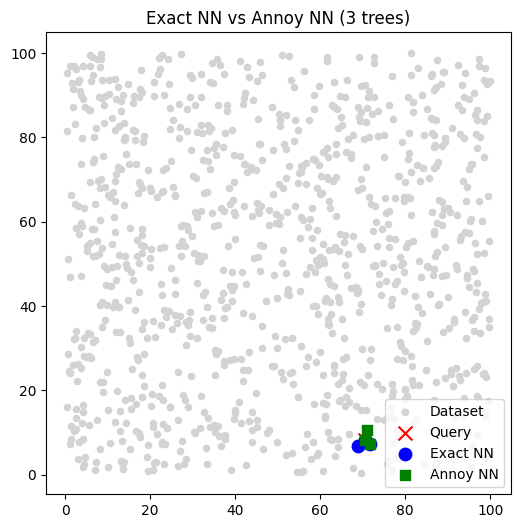

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

Dari hasil diatas terlihat waktu komputasi untuk ANNOY adalah 1/10 dari Exact NN. Lakukan percobaan dan isikan hasil percobaan pada tabel berikut.

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from annoy import AnnoyIndex
import time

# --- 1. PARAMETER EKSPERIMEN ---

# Asumsi yang kita buat
d = 40  # Dimensi data (misal: 40)
k = 3   # Jumlah tetangga terdekat yang dicari

# Kombinasi percobaan dari tabel Anda
param_grid = [
    {'metric': 'Euclidean', 'n_trees': 3,   'n_data': 1000},
    {'metric': 'Euclidean', 'n_trees': 8,   'n_data': 1000},
    {'metric': 'Euclidean', 'n_trees': 3,   'n_data': 100000},
    {'metric': 'Angular',   'n_trees': 3,   'n_data': 1000},
    {'metric': 'Angular',   'n_trees': 8,   'n_data': 1000},
    {'metric': 'Angular',   'n_trees': 3,   'n_data': 100000}
    # Anda bisa tambahkan baris untuk n_data=100000, n_trees=8 di sini jika mau
]

# List untuk menyimpan hasil
results_for_table = []

print("Memulai Eksperimen... (Ini mungkin butuh beberapa menit, terutama untuk 100.000 data)")
print("-" * 70)

# --- 2. LAKUKAN EKSPERIMEN UNTUK SETIAP BARIS TABEL ---
for params in param_grid:
    metric = params['metric']
    n_trees = params['n_trees']
    n_data = params['n_data']

    print(f"Menjalankan: Metric={metric}, Trees={n_trees}, Data={n_data}")

    # Tentukan metric untuk sklearn dan annoy
    # ANNOY 'angular' ekuivalen dengan 'cosine' di sklearn untuk pencarian ranking
    sklearn_metric = 'euclidean' if metric == 'Euclidean' else 'cosine'
    annoy_metric = 'euclidean' if metric == 'Euclidean' else 'angular'

    # Buat data acak
    np.random.seed(42)
    # Buat data dari -1 ke 1 (lebih baik untuk angular/cosine)
    data = (np.random.rand(n_data, d) * 2 - 1).astype('float32')

    # Ambil 1 data untuk dijadikan query
    # Kita slice [0:1] agar tetap 2D (dibutuhkan oleh sklearn)
    query_vector_2d = data[0:1]
    query_vector_1d = data[0]

    # --- 3. UJI EXACT NN (Brute-Force) ---
    nn_exact = NearestNeighbors(n_neighbors=k+1, algorithm='brute', metric=sklearn_metric)

    start_exact = time.time()
    nn_exact.fit(data)
    # Cari k+1 tetangga (karena 1 tetangga adalah dirinya sendiri)
    distances, indices = nn_exact.kneighbors(query_vector_2d)
    time_exact = time.time() - start_exact

    # Ambil k tetangga, buang hasil pertama (dirinya sendiri, index 0)
    result_idx_exact = indices[0][1:]

    # --- 4. UJI ANNOY (Approximate NN) ---
    ann_index = AnnoyIndex(d, annoy_metric)

    start_annoy = time.time()
    # Build Index
    for i in range(n_data):
        ann_index.add_item(i, data[i])
    ann_index.build(n_trees)

    # Query Index
    # Cari k+1 (untuk membuang diri sendiri), search_k=-1 (default)
    indices_ann = ann_index.get_nns_by_vector(query_vector_1d, k+1, search_k=-1)
    time_annoy = time.time() - start_annoy

    # Buang diri sendiri (index 0) dan ambil k tetangga
    result_idx_annoy = [idx for idx in indices_ann if idx != 0][:k]

    # --- 5. Simpan Hasil ---
    results_for_table.append({
        'Metric': metric,
        'Tree': n_trees,
        'Data': n_data,
        'Index ENN': result_idx_exact,
        'Index ANN': result_idx_annoy,
        'Waktu ENN': f"{time_exact:.4f}",
        'Waktu ANN': f"{time_annoy:.4f}"
    })

print("-" * 70)
print("Eksperimen Selesai. Gunakan hasil ini untuk mengisi tabel Anda:")
print("-" * 70)

# --- 6. TAMPILKAN HASIL ---
# Format header tabel
print(f"{'Distance':<10} | {'Tree':<5} | {'Data':<10} | {'Index ENN':<20} | {'Index ANN':<20} | {'Waktu ENN':<10} | {'Waktu ANN':<10}")
print("="*90)

for res in results_for_table:
    print(f"{res['Metric']:<10} | {res['Tree']:<5} | {res['Data']:<10} | {str(res['Index ENN']):<20} | {str(res['Index ANN']):<20} | {res['Waktu ENN']:<10} | {res['Waktu ANN']:<10}")

Memulai Eksperimen... (Ini mungkin butuh beberapa menit, terutama untuk 100.000 data)
----------------------------------------------------------------------
Menjalankan: Metric=Euclidean, Trees=3, Data=1000
Menjalankan: Metric=Euclidean, Trees=8, Data=1000
Menjalankan: Metric=Euclidean, Trees=3, Data=100000
Menjalankan: Metric=Angular, Trees=3, Data=1000
Menjalankan: Metric=Angular, Trees=8, Data=1000
Menjalankan: Metric=Angular, Trees=3, Data=100000
----------------------------------------------------------------------
Eksperimen Selesai. Gunakan hasil ini untuk mengisi tabel Anda:
----------------------------------------------------------------------
Distance   | Tree  | Data       | Index ENN            | Index ANN            | Waktu ENN  | Waktu ANN 
Euclidean  | 3     | 1000       | [210 508 702]        | [166, 949, 742]      | 0.1339     | 0.0342    
Euclidean  | 8     | 1000       | [210 508 702]        | [166, 949, 742]      | 0.0017     | 0.0235    
Euclidean  | 3     | 100000

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.9518 ms

Annoy NN index: [219, 898, 593]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.2793154441691197)]
Waktu Annoy: 0.133 ms


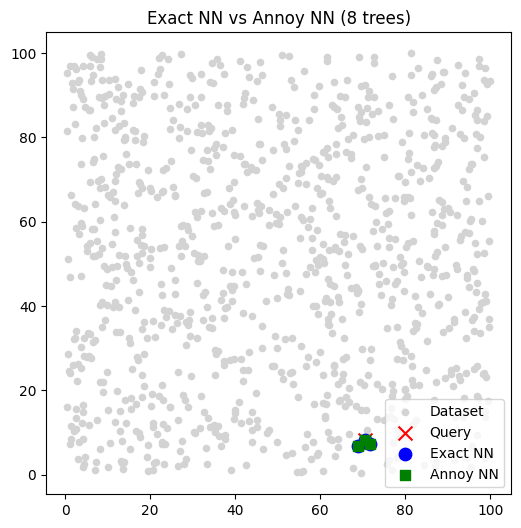

In [ ]:
# Perbedaan antara pencarian nearest neighbor secara Exact dan menggunakan Annoy (8 trees) 1000 data

import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact * 1000, 4), "ms")

# 3. Annoy NN (8 trees)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # menggunakan 8 pohon

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i] - query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann * 1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact, 0], X[idx_exact, 1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann, 0], X[idx_ann, 1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (8 trees)")
plt.show()

Kode tersebut memang sengaja tidak menghitung waktu build index. Waktu yang diukur (baik time_exact maupun time_ann) adalah waktu query (waktu pencarian).

Alasannya adalah untuk membedakan dua konsep fundamental dalam pencarian nearest neighbor:

Waktu Build (Offline): Ini adalah proses "mempersiapkan" data agar mudah dicari.

Waktu Query (Online): Ini adalah proses "mencari" data itu sendiri.